<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/test7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
warnings.filterwarnings("ignore")

In [131]:
data=pd.read_csv('/content/drive/MyDrive/ipynb/datasets/employee.csv')

In [132]:
data.shape

(14249, 10)

In [133]:
data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [134]:
data.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

Missing Value Imputation

In [135]:
df1=data
df1['filed_complaint'].fillna(0,inplace=True)
df1['recently_promoted'].fillna(0,inplace=True)
df1['department'].fillna(data['department'].mode()[0],inplace=True)
df1['last_evaluation'].fillna(data['last_evaluation'].mean(),inplace=True)
df1['satisfaction'].fillna(data['satisfaction'].mean(),inplace=True)
df1['tenure'].fillna(data['tenure'].mean(),inplace=True)

In [136]:
df1['department'].mode()[0]

'sales'

In [137]:
df1.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0
1,232,support,0.0,0.718477,3,0.0,low,0.834544,Employed,2.0
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0


In [138]:
df1.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
dtype: int64

In [139]:
df1.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

EDA

Visualizing distribution of employee tenure using a histogram.

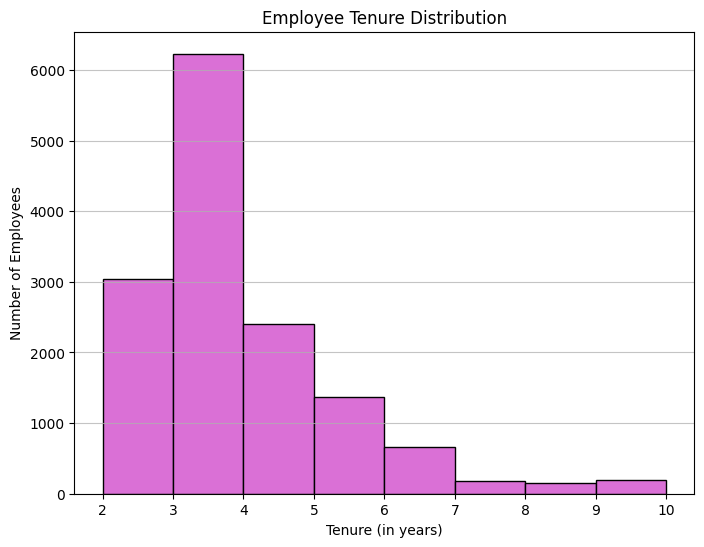

In [140]:
plt.figure(figsize=(8, 6))
plt.hist(df1['tenure'], bins=8, color='orchid', edgecolor='black')
plt.title('Employee Tenure Distribution')
plt.xlabel('Tenure (in years)')
plt.ylabel('Number of Employees')
plt.grid(axis='y', alpha=0.75)

Confusion Matrix (Tenure vs. Status) to understand trend

Text(95.7222222222222, 0.5, 'Tenure (in years)')

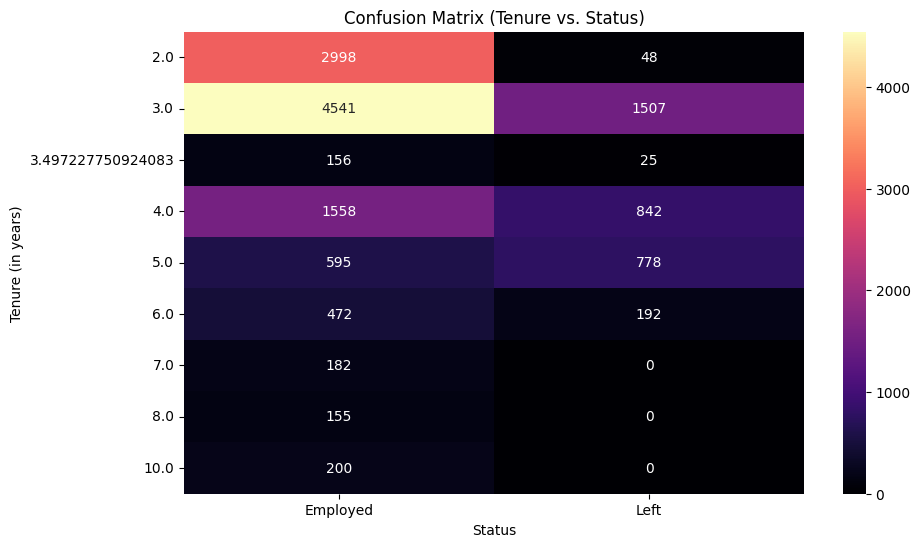

In [141]:
crosstab = pd.crosstab(df1['tenure'], df1['status'])
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='magma')
plt.title('Confusion Matrix (Tenure vs. Status)')
plt.xlabel('Status')
plt.ylabel('Tenure (in years)')

From the following Confusion Matrix between Tenure(in years) and Employee status, we can observe that employees who left the company have tenure of less than or equal to 6 years with the largest attrition rate bein observed at 3 years in the company

Boxplot to examine the distribution of job satisfaction scores among employees who left the company and those who are still employed

Text(0, 0.5, 'Job Satisfaction Score')

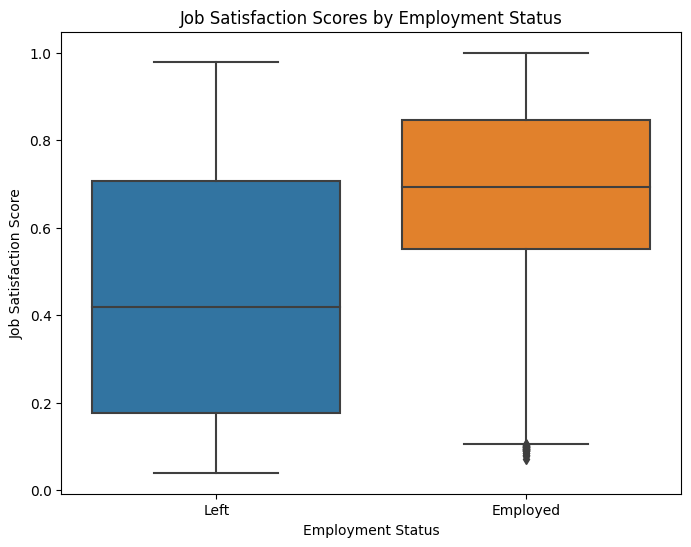

In [142]:
# Filter the data for employees who left and those who are still employed
left_employees = df1[df1['status'] == 'Left']
employed_employees = df1[df1['status'] == 'Employed']

# boxplot compares job satisfaction scores
plt.figure(figsize=(8, 6))
sns.boxplot(x='status', y='satisfaction', data=pd.concat([left_employees, employed_employees]))
plt.title('Job Satisfaction Scores by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Job Satisfaction Score')

Pie Chart to show the distribution of attrition (employees who left vs employees who are still employed) in the dataset

Percentage of employees who have left the company: 23.8%


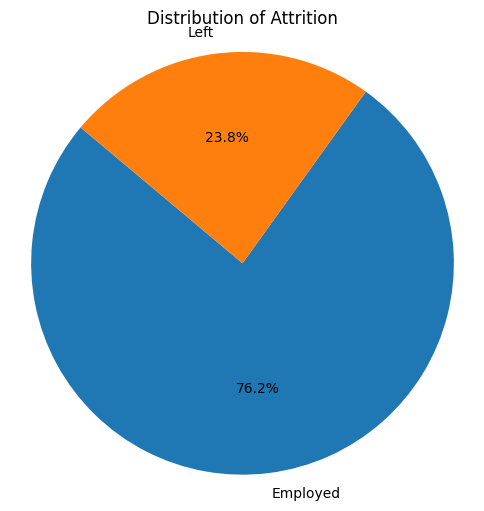

In [143]:
# Count the number of employees in each employment status category
attrition_counts = df1['status'].value_counts()
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Attrition')
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
# Calculate the percentage of employees who have left the company
percentage_left = (attrition_counts['Left'] / attrition_counts.sum()) * 100
print(f"Percentage of employees who have left the company: {percentage_left:.1f}%")

Scatter Plot to explore the relationship between employee satisfaction scores and their last evaluation scores.

Text(0, 0.5, 'Last Evaluation Score')

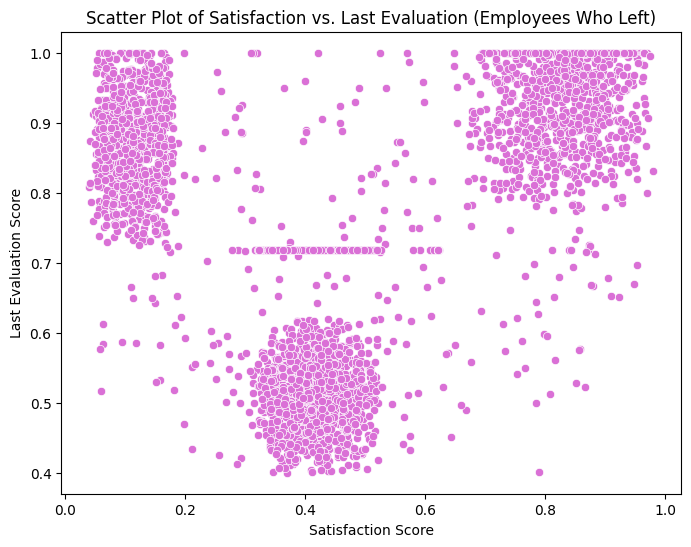

In [144]:
# Filter the data for employees who left
left_employees = df1[df1['status'] == 'Left']
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='satisfaction', y='last_evaluation',\
                data=left_employees, color='orchid')
plt.title('Scatter Plot of Satisfaction vs. Last Evaluation (Employees Who Left)')
plt.xlabel('Satisfaction Score')
plt.ylabel('Last Evaluation Score')

Check for correlation between variables - satisfaction and last evaluation scores for employees who left

In [145]:
# Extract 'satisfaction' and 'last_evaluation' scores for employees who left
satisfaction_left = left_employees['satisfaction']
last_evaluation_left = left_employees['last_evaluation']
# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(satisfaction_left, last_evaluation_left)
# Set the significance level
alpha = 0.05
# Determine significance and print the result
if p_value < alpha:
  print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
  print("There is a statistically significant correlation between satisfaction and last evaluation scores for employees who left.")
else:
  print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
  print("There is no statistically significant correlation between satisfaction and last evaluation scores for employees who left.")

Pearson Correlation Coefficient: 0.18
There is a statistically significant correlation between satisfaction and last evaluation scores for employees who left.


Encoding salary column and dropping unimportant features

In [146]:
df1.drop(['department'],axis=1,inplace=True)
df1.replace({'salary':{'low':0,'medium':1,'high':2}},inplace=True)

In [147]:
df1.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,0.0,0.932868,4,0.0,0,0.829896,Left,5.0
1,232,0.0,0.718477,3,0.0,0,0.834544,Employed,2.0
2,184,0.0,0.788830,3,0.0,1,0.834988,Employed,3.0
3,206,0.0,0.575688,4,0.0,0,0.424764,Employed,2.0
4,249,0.0,0.845217,3,0.0,0,0.779043,Employed,3.0


Train-Test Splitting

In [148]:
X = df1.drop('status', axis=1)
y = df1['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [149]:
X.head().columns

Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'salary', 'satisfaction', 'tenure'],
      dtype='object')

In [150]:
clf = DecisionTreeClassifier(random_state=33)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=33)

Evaluating and determining more effective Decision Tree model

In [151]:
# Create two Decision Tree Classifiers with different criteria: Gini and Entropy
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=33)
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=33)
# Train the Gini-based classifier on the training data
clf_gini.fit(X_train, y_train)
# Train the Entropy-based classifier on the training data
clf_entropy.fit(X_train, y_train)
# Make predictions on the testing data for both classifiers
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)
# Evaluate the classifiers and compare their performance
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Accuracy (Gini):", accuracy_gini)
print("Accuracy (Entropy):", accuracy_entropy)

Accuracy (Gini): 0.960701754385965
Accuracy (Entropy): 0.9659649122807018


Entropy as criteria for finding the best splits in the decision
tree gives higher accuracy.

Visualizing Decision Tree structure and saving it in a pdf file

In [152]:
# Visualize the decision tree using graphviz
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True
)
# Create a graph object from the dot data
graph = graphviz.Source(dot_data)
# Save the visualization to a file (optional)
# graph.render("decision_tree")
# Display the decision tree
graph.view()

'Source.gv.pdf'

Calculating depth of tree

In [153]:
depth_g = clf_gini.get_depth()
depth_e = clf_entropy.get_depth()
print('Depth of Decision Tree splitted in the criteria of Gini :',depth_g)
print('Depth of Decision Tree splitted in the criteria of Entropy :',depth_e)

Depth of Decision Tree splitted in the criteria of Gini : 27
Depth of Decision Tree splitted in the criteria of Entropy : 26


Finding out most influential features for predicting employee attrition

In [154]:
feature_importances = clf.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
  print(f"{feature}: {importance:.4f}")

Feature Importances:
avg_monthly_hrs: 0.1799
filed_complaint: 0.0027
last_evaluation: 0.1091
n_projects: 0.2294
recently_promoted: 0.0000
salary: 0.0072
satisfaction: 0.3193
tenure: 0.1523


Pruning by Setting Minimum Leaf Size

Case 1: Pruning Entropy with Minimum Samples Leaf

In [155]:
# dictionary to store accuracy results for different max_depth values
accuracy_results = {}
min_samples_leaf_values = [1, 5, 10, 20]
for min_samples_leaf in min_samples_leaf_values:
  # Create a Decision Tree Classifier with the current min_samples_leaf value
  clf = DecisionTreeClassifier(criterion='entropy', random_state=33, min_samples_leaf=min_samples_leaf)
  # Train the classifier on the training data
  clf.fit(X_train, y_train)
  # Make predictions on the testing data
  y_pred = clf.predict(X_test)
  # Calculate accuracy and store it in the results dictionary
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_results[min_samples_leaf] = accuracy
# Find the min_samples_leaf value with the highest accuracy
best_min_samples_leaf = max(accuracy_results, key=accuracy_results.get)
best_accuracy = accuracy_results[best_min_samples_leaf]
print("Accuracy Results (Pruning by Min Samples Leaf):")
for min_samples_leaf, accuracy in accuracy_results.items():
  print(f"Min Samples Leaf: {min_samples_leaf}, Accuracy: {accuracy:.4f}")
print(f"Best Min Samples Leaf: {best_min_samples_leaf}")
print(f"Best Accuracy: {best_accuracy:.4f}")

Accuracy Results (Pruning by Min Samples Leaf):
Min Samples Leaf: 1, Accuracy: 0.9660
Min Samples Leaf: 5, Accuracy: 0.9660
Min Samples Leaf: 10, Accuracy: 0.9618
Min Samples Leaf: 20, Accuracy: 0.9674
Best Min Samples Leaf: 20
Best Accuracy: 0.9674


Case 2: Pruning Gini with Minimum Samples Leaf

In [156]:
# dictionary to store accuracy results for different max_depth values
accuracy_results = {}
min_samples_leaf_values = [1, 5, 10, 20]
for min_samples_leaf in min_samples_leaf_values:
  # Create a Decision Tree Classifier with the current min_samples_leaf value
  clf = DecisionTreeClassifier(criterion='gini', random_state=33, min_samples_leaf=min_samples_leaf)
  # Train the classifier on the training data
  clf.fit(X_train, y_train)
  # Make predictions on the testing data
  y_pred = clf.predict(X_test)
  # Calculate accuracy and store it in the results dictionary
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_results[min_samples_leaf] = accuracy
# Find the min_samples_leaf value with the highest accuracy
best_min_samples_leaf = max(accuracy_results, key=accuracy_results.get)
best_accuracy = accuracy_results[best_min_samples_leaf]

print("Accuracy Results (Pruning by Min Samples Leaf):")
for min_samples_leaf, accuracy in accuracy_results.items():
  print(f"Min Samples Leaf: {min_samples_leaf}, Accuracy: {accuracy:.4f}")

print(f"Best Min Samples Leaf: {best_min_samples_leaf}")
print(f"Best Accuracy: {best_accuracy:.4f}")

Accuracy Results (Pruning by Min Samples Leaf):
Min Samples Leaf: 1, Accuracy: 0.9607
Min Samples Leaf: 5, Accuracy: 0.9642
Min Samples Leaf: 10, Accuracy: 0.9674
Min Samples Leaf: 20, Accuracy: 0.9660
Best Min Samples Leaf: 10
Best Accuracy: 0.9674


Pruning by Setting Maximum Depth

Case 3: Pruning Entropy with Maximum Depth

In [157]:
# dictionary to store accuracy results for different max_depth values
accuracy_results = {}
# Experiment with different max_depth values
max_depth_values = [None, 5, 10, 20, 30, 40]
for max_depth in max_depth_values:
  # Create a Decision Tree Classifier with the current max_depth value
  clf = DecisionTreeClassifier(criterion='entropy', random_state=33, max_depth=max_depth)
  # Train the classifier on the training data
  clf.fit(X_train, y_train)
  # Make predictions on the testing data
  y_pred = clf.predict(X_test)
  # Calculate accuracy and store it in the results dictionary
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_results[max_depth] = accuracy
# Find the max_depth value with the highest accuracy
best_max_depth = max(accuracy_results, key=accuracy_results.get)
best_accuracy = accuracy_results[best_max_depth]
print("Accuracy Results (Pruning by Max Depth):")
for max_depth, accuracy in accuracy_results.items():
  print(f"Max Depth: {max_depth}, Accuracy: {accuracy:.4f}")
print(f"Best Max Depth: {best_max_depth}")
print(f"Best Accuracy: {best_accuracy:.4f}")

Accuracy Results (Pruning by Max Depth):
Max Depth: None, Accuracy: 0.9660
Max Depth: 5, Accuracy: 0.9674
Max Depth: 10, Accuracy: 0.9691
Max Depth: 20, Accuracy: 0.9663
Max Depth: 30, Accuracy: 0.9660
Max Depth: 40, Accuracy: 0.9660
Best Max Depth: 10
Best Accuracy: 0.9691


Case 4: Pruning Gini with Maximum Depth

In [158]:
# dictionary to store accuracy results for different max_depth values
accuracy_results = {}
# Experiment with different max_depth values
max_depth_values = [None, 5, 10, 20, 30, 40]
for max_depth in max_depth_values:
  # Create a Decision Tree Classifier with the current max_depth value
  clf = DecisionTreeClassifier(criterion='gini', random_state=33, max_depth=max_depth)
  # Train the classifier on the training data
  clf.fit(X_train, y_train)
  # Make predictions on the testing data
  y_pred = clf.predict(X_test)
  # Calculate accuracy and store it in the results dictionary
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_results[max_depth] = accuracy
# Find the max_depth value with the highest accuracy
best_max_depth = max(accuracy_results, key=accuracy_results.get)
best_accuracy = accuracy_results[best_max_depth]
print("Accuracy Results (Pruning by Max Depth):")
for max_depth, accuracy in accuracy_results.items():
  print(f"Max Depth: {max_depth}, Accuracy: {accuracy:.4f}")
print(f"Best Max Depth: {best_max_depth}")
print(f"Best Accuracy: {best_accuracy:.4f}")

Accuracy Results (Pruning by Max Depth):
Max Depth: None, Accuracy: 0.9607
Max Depth: 5, Accuracy: 0.9681
Max Depth: 10, Accuracy: 0.9709
Max Depth: 20, Accuracy: 0.9604
Max Depth: 30, Accuracy: 0.9607
Max Depth: 40, Accuracy: 0.9607
Best Max Depth: 10
Best Accuracy: 0.9709


Pruned Model Performance for Gini Impurity & Entropy

Case 1: Evaluating Pruned Decision Tree on Entropy with Minimum Samples Leaf

In [159]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Pruning Entropy with Minimum Samples Leaf
clf_entropy_min_samples = DecisionTreeClassifier(criterion='entropy', random_state=42, min_samples_leaf=20)
clf_entropy_min_samples.fit(X_train, y_train)
y_pred_entropy_min_samples = clf_entropy_min_samples.predict(X_test)
accuracy_entropy_min_samples = accuracy_score(y_test, y_pred_entropy_min_samples)
precision_entropy_min_samples = precision_score(y_test, y_pred_entropy_min_samples, average='binary', pos_label='Left')
recall_entropy_min_samples = recall_score(y_test, y_pred_entropy_min_samples, average='binary', pos_label='Left')
f1_score_entropy_min_samples = f1_score(y_test, y_pred_entropy_min_samples, average='binary', pos_label='Left')
print("Performance Metrics for Entropy with Minimum Samples Leaf:")
print(f"Accuracy: {accuracy_entropy_min_samples:.4f}")
print(f"Precision: {precision_entropy_min_samples:.4f}")
print(f"Recall: {recall_entropy_min_samples:.4f}")
print(f"F1-Score: {f1_score_entropy_min_samples:.4f}")

Performance Metrics for Entropy with Minimum Samples Leaf:
Accuracy: 0.9674
Precision: 0.9513
Recall: 0.9029
F1-Score: 0.9265


Case 2: Evaluating Pruned Decision Tree on Gini Impurity with Minimum Samples Leaf

In [160]:
# Pruning Gini with Minimum Samples Leaf
clf_gini_min_samples = DecisionTreeClassifier(criterion='gini', random_state=42, min_samples_leaf=10)
clf_gini_min_samples.fit(X_train, y_train)
y_pred_gini_min_samples = clf_gini_min_samples.predict(X_test)
accuracy_gini_min_samples = accuracy_score(y_test, y_pred_gini_min_samples)
precision_gini_min_samples = precision_score(y_test, y_pred_gini_min_samples, average='binary', pos_label='Left')
recall_gini_min_samples = recall_score(y_test, y_pred_gini_min_samples, average='binary', pos_label='Left')
f1_score_gini_min_samples = f1_score(y_test, y_pred_gini_min_samples, average='binary', pos_label='Left')
print("Performance Metrics for Gini with Minimum Samples Leaf:")
print(f"Accuracy: {accuracy_gini_min_samples:.4f}")
print(f"Precision: {precision_gini_min_samples:.4f}")
print(f"Recall: {recall_gini_min_samples:.4f}")
print(f"F1-Score: {f1_score_gini_min_samples:.4f}")

Performance Metrics for Gini with Minimum Samples Leaf:
Accuracy: 0.9667
Precision: 0.9468
Recall: 0.9045
F1-Score: 0.9251


Case 3: Evaluating Pruned Decision Tree on Entropy with Mximum Depth

In [161]:
# Pruning Entropy with Maximum Depth
clf_entropy_max_depth = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=10)
clf_entropy_max_depth.fit(X_train, y_train)
y_pred_entropy_max_depth = clf_entropy_max_depth.predict(X_test)
accuracy_entropy_max_depth = accuracy_score(y_test, y_pred_entropy_max_depth)
precision_entropy_max_depth = precision_score(y_test, y_pred_entropy_max_depth, average='binary', pos_label='Left')
recall_entropy_max_depth = recall_score(y_test, y_pred_entropy_max_depth, average='binary', pos_label='Left')
f1_score_entropy_max_depth = f1_score(y_test, y_pred_entropy_max_depth, average='binary', pos_label='Left')
print("Performance Metrics for Entropy with Maximum Depth:")
print(f"Accuracy: {accuracy_entropy_max_depth:.4f}")
print(f"Precision: {precision_entropy_max_depth:.4f}")
print(f"Recall: {recall_entropy_max_depth:.4f}")
print(f"F1-Score: {f1_score_entropy_max_depth:.4f}")

Performance Metrics for Entropy with Maximum Depth:
Accuracy: 0.9677
Precision: 0.9428
Recall: 0.9137
F1-Score: 0.9280


Case 4: Evaluating Pruned Decision Tree on Gini Impurity with Maximum Depth

In [162]:
# Pruning Gini with Maximum Depth
clf_gini_max_depth = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=10)
clf_gini_max_depth.fit(X_train, y_train)
y_pred_gini_max_depth = clf_gini_max_depth.predict(X_test)
accuracy_gini_max_depth = accuracy_score(y_test, y_pred_gini_max_depth)
precision_gini_max_depth = precision_score(y_test, y_pred_gini_max_depth, average='binary', pos_label='Left')
recall_gini_max_depth = recall_score(y_test, y_pred_gini_max_depth, average='binary', pos_label='Left')
f1_score_gini_max_depth = f1_score(y_test, y_pred_gini_max_depth, average='binary', pos_label='Left')
print("Performance Metrics for Gini with Maximum Depth:")
print(f"Accuracy: {accuracy_gini_max_depth:.4f}")
print(f"Precision: {precision_gini_max_depth:.4f}")
print(f"Recall: {recall_gini_max_depth:.4f}")
print(f"F1-Score: {f1_score_gini_max_depth:.4f}")

Performance Metrics for Gini with Maximum Depth:
Accuracy: 0.9702
Precision: 0.9462
Recall: 0.9214
F1-Score: 0.9336


Diverging Bar Chart to display the Confusion Matrix, showing true positives,true
negatives, false positives, and false negatives for all 4 cases

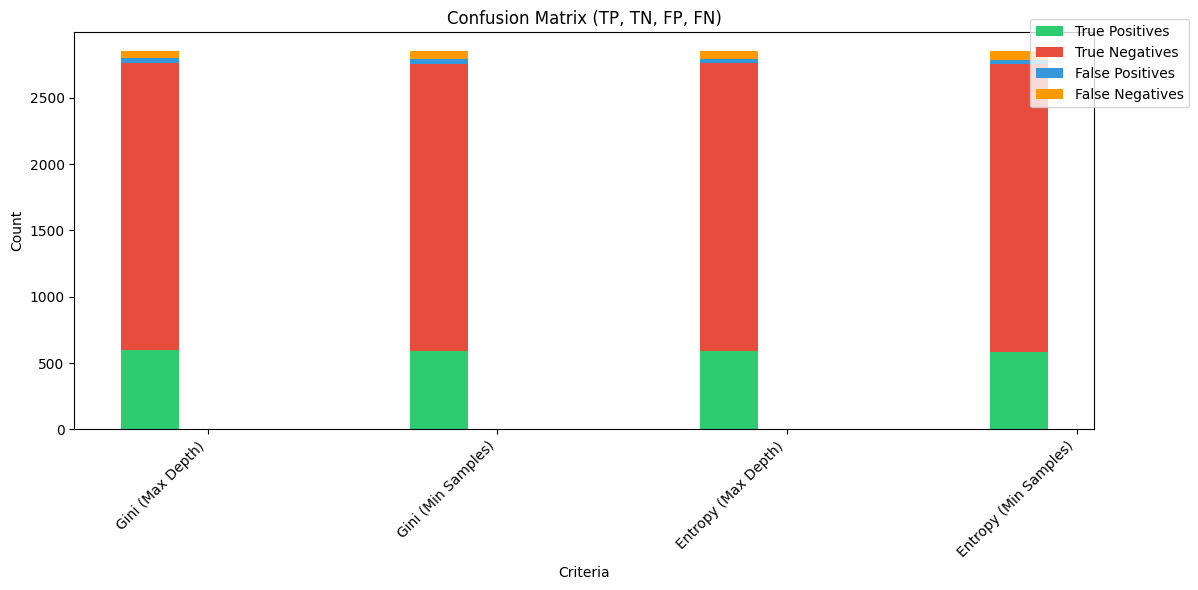

In [163]:
from sklearn.metrics import confusion_matrix
# Calculate confusion matrices for each model
confusion_matrix_gini_max_depth = confusion_matrix(y_test, clf_gini_max_depth.predict(X_test))
confusion_matrix_gini_min_samples = confusion_matrix(y_test, clf_gini_min_samples.predict(X_test))
confusion_matrix_entropy_max_depth = confusion_matrix(y_test, clf_entropy_max_depth.predict(X_test))
confusion_matrix_entropy_min_samples = confusion_matrix(y_test, clf_entropy_min_samples.predict(X_test))
criteria_labels = ['Gini (Max Depth)', 'Gini (Min Samples)', 'Entropy (Max Depth)', 'Entropy (Min Samples)']
colors = ['#2ecc71', '#e74c3c', '#3498db', '#ff9900']
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
# bar positions for each criteria
x = np.arange(len(criteria_labels))
# plot true positives, true negatives, false positives, and false negatives for each criteria
tp_values = [confusion_matrix_gini_max_depth[1, 1], confusion_matrix_gini_min_samples[1, 1], confusion_matrix_entropy_max_depth[1, 1], confusion_matrix_entropy_min_samples[1, 1]]
tn_values = [confusion_matrix_gini_max_depth[0, 0], confusion_matrix_gini_min_samples[0, 0], confusion_matrix_entropy_max_depth[0, 0], confusion_matrix_entropy_min_samples[0, 0]]
fp_values = [confusion_matrix_gini_max_depth[0, 1], confusion_matrix_gini_min_samples[0, 1], confusion_matrix_entropy_max_depth[0, 1], confusion_matrix_entropy_min_samples[0, 1]]
fn_values = [confusion_matrix_gini_max_depth[1, 0], confusion_matrix_gini_min_samples[1, 0], confusion_matrix_entropy_max_depth[1, 0], confusion_matrix_entropy_min_samples[1, 0]]
ax.bar(x - bar_width, tp_values, width=bar_width, label='True Positives', color=colors[0])
ax.bar(x - bar_width, tn_values, bottom=tp_values, width=bar_width, label='True Negatives', color=colors[1])
ax.bar(x - bar_width, fp_values, bottom=np.array(tp_values) + np.array(tn_values), width=bar_width, label='False Positives', color=colors[2])
ax.bar(x - bar_width, fn_values, bottom=np.array(tp_values) + np.array(tn_values) + np.array(fp_values), width=bar_width, label='False Negatives', color=colors[3])
ax.set_xlabel('Criteria')
ax.set_ylabel('Count')
ax.set_title('Confusion Matrix (TP, TN, FP, FN)')
ax.set_xticks(x)
ax.set_xticklabels(criteria_labels, rotation=45, ha='right')
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()

Bar Chart to visualize the importance of each feature in the pruned decision tree model for all 4 cases

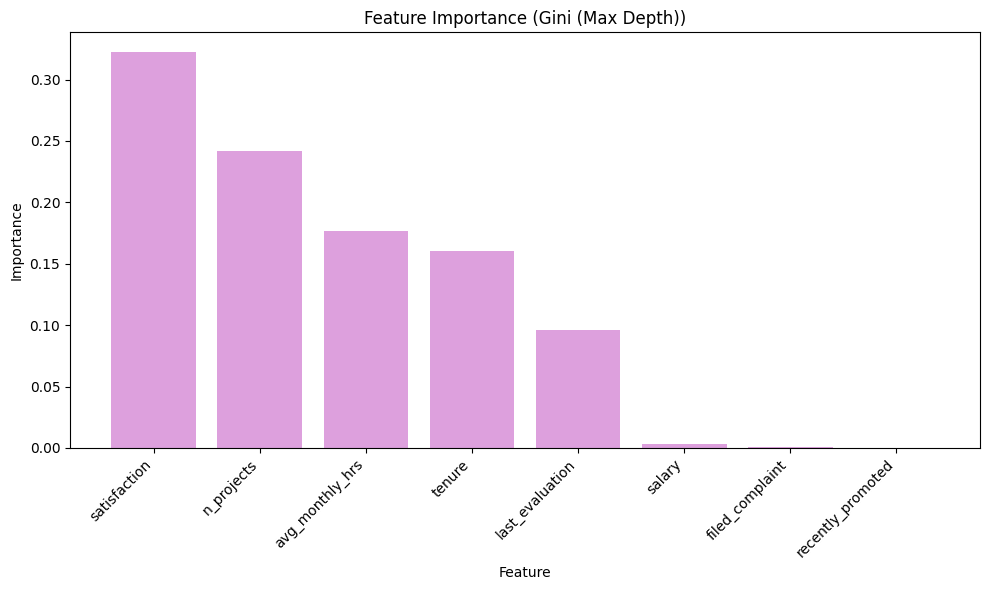

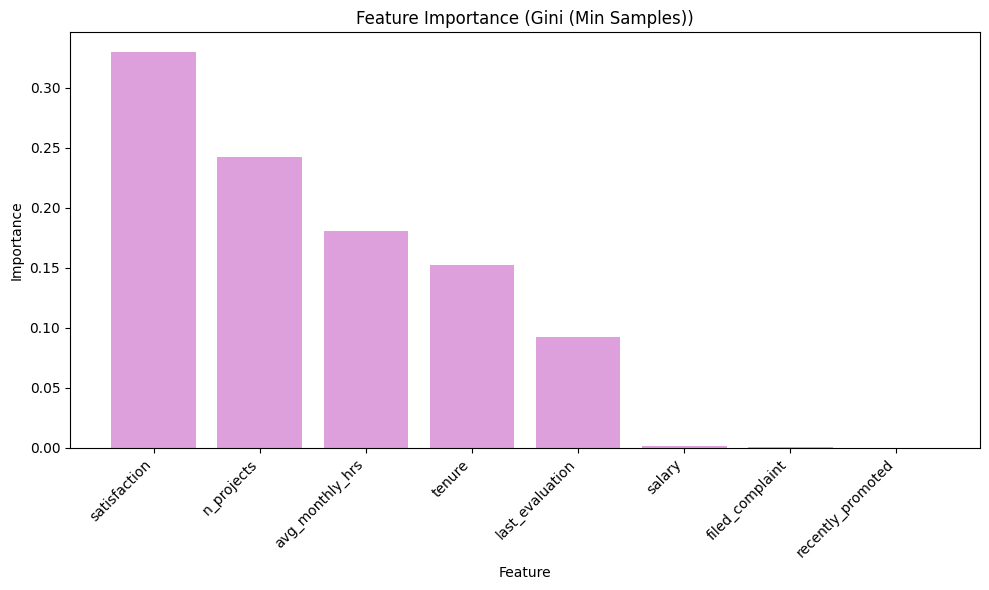

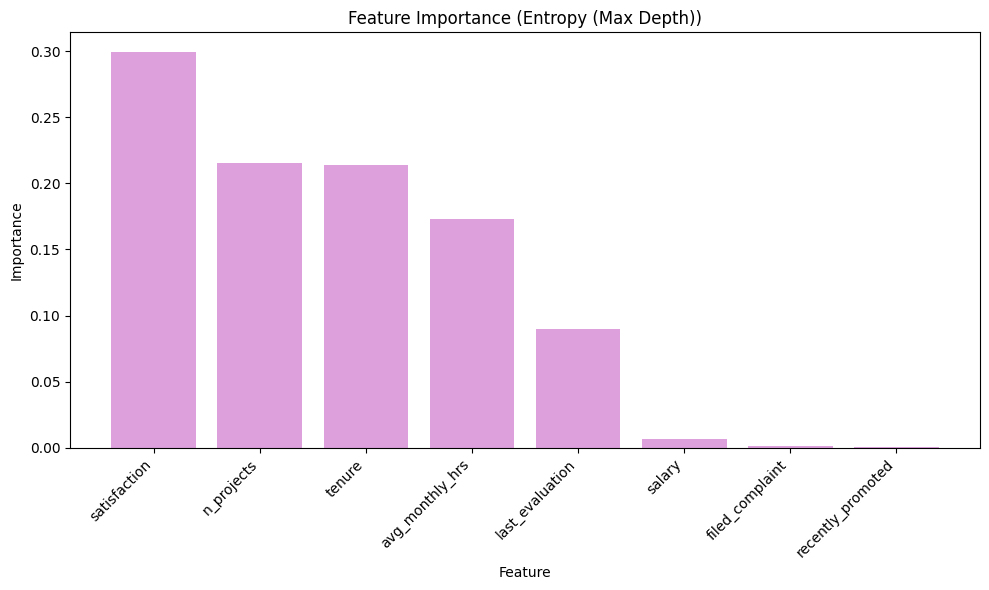

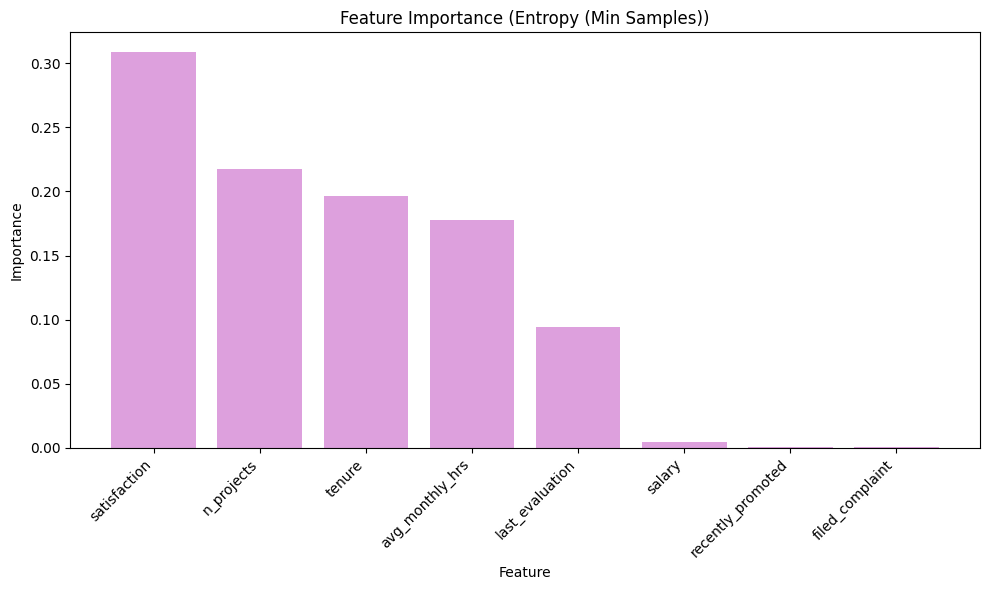

In [164]:
def plot_feature_importance(clf, criterion_label):
  feature_importances = clf.feature_importances_
  feature_names = X.columns
  sorted_indices = feature_importances.argsort()[::-1]  # sort in descending order
  plt.figure(figsize=(10, 6))
  plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center', color='plum')
  plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices], rotation=45, ha='right')
  plt.title(f'Feature Importance ({criterion_label})')
  plt.xlabel('Feature')
  plt.ylabel('Importance')
  plt.tight_layout()
# Plot feature importances for all four cases
plot_feature_importance(clf_gini_max_depth, 'Gini (Max Depth)')
plot_feature_importance(clf_gini_min_samples, 'Gini (Min Samples)')
plot_feature_importance(clf_entropy_max_depth, 'Entropy (Max Depth)')
plot_feature_importance(clf_entropy_min_samples, 'Entropy (Min Samples)')

Inference : After observing accuracy for all the 4 possible cases, model with splitting on the criteria of Gini Impurity with Maximum Depth of 10 is the best effective predictor of employee attrition with an accuracy of 97%.